In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import missingno as msno
from IPython.display import HTML
from matplotlib import pylab
from matplotlib_venn import venn3, venn3_circles, venn2
import seaborn as sns

%matplotlib inline

In [2]:
#Color Palette
plt.rcParams['axes.facecolor'] = '#EAffd0'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['#f38181','#95e1d3','#fce38a'])

In [3]:
kernels = pd.read_csv('../Datasets/KernelsCleaned.csv')

In [4]:
kernels.dtypes

Id                             int64
AuthorUserId                   int64
CurrentKernelVersionId       float64
ForkParentKernelVersionId    float64
ForumTopicId                 float64
FirstKernelVersionId         float64
IsProjectLanguageTemplate       bool
CurrentUrlSlug                object
Medal                        float64
TotalViews                     int64
TotalComments                  int64
TotalVotes                     int64
LanguageName                  object
dtype: object

In [5]:
display(HTML(kernels.head().to_html(index=False)))

Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,TotalViews,TotalComments,TotalVotes,LanguageName
1,2505,205.0,NaN,NaN,1.0,False,hello,NaN,24,0,0,R
2,3716,1748.0,NaN,26670.0,2.0,False,rf-proximity,3.0,7547,1,12,R
4,3716,41.0,NaN,NaN,9.0,False,r-version,NaN,9,0,0,R
5,28963,19.0,NaN,NaN,13.0,False,test1,NaN,9,0,0,R
6,3716,21.0,NaN,NaN,15.0,False,are-icons-missing,NaN,7,0,0,R


In [6]:
kernels.describe()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,Medal,TotalViews,TotalComments,TotalVotes
count,2.019810e+05,2.019810e+05,1.655960e+05,6.368500e+04,15698.000000,2.008660e+05,7347.000000,201981.000000,201981.000000,201981.000000
mean,4.118388e+05,7.943445e+05,1.828903e+06,1.349575e+06,43767.133138,1.537051e+06,2.661222,297.071487,0.545279,1.817597
std,5.112717e+05,5.408731e+05,1.861784e+06,1.512547e+06,15572.369904,1.760108e+06,0.615812,2848.559756,6.059064,21.696009
min,1.000000e+00,3.680000e+02,1.900000e+01,1.000000e+00,14433.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,8.950000e+04,4.155380e+05,4.706428e+05,3.075340e+05,30157.250000,3.315360e+05,2.000000,13.000000,0.000000,0.000000
50%,1.879810e+05,6.888010e+05,1.059955e+06,6.259190e+05,43705.000000,8.829585e+05,3.000000,23.000000,0.000000,0.000000
75%,4.858860e+05,1.001888e+06,2.599765e+06,2.456081e+06,57428.500000,1.889528e+06,3.000000,85.000000,0.000000,0.000000
max,1.994521e+06,2.431709e+06,6.954829e+06,6.953839e+06,70160.000000,6.954829e+06,3.000000,432573.000000,894.000000,2883.000000


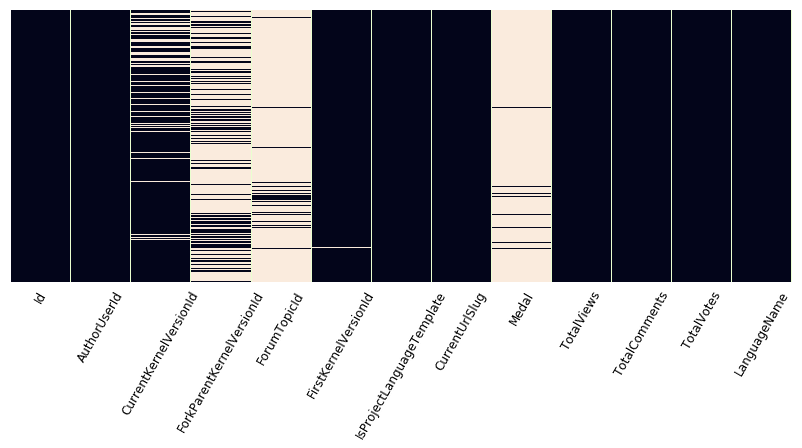

In [7]:
#Missing Values Heatmap
fig1 = plt.figure(figsize = (14,5))
ax = sns.heatmap(kernels.isnull(),cbar = False) #turn off colorbar for heatmap
plt.yticks([]) #turn off yticks
plt.xticks(rotation=60,fontsize=12)
for tic in ax.xaxis.get_major_ticks(): #remove x axis tick dashes
    tic.tick1On = tic.tick2On = False
plt.savefig('../EDA/Figures/fig1.png',bbox_inches='tight')
plt.show()

In [8]:
#Finding relation between forum ID and Medal
temp = kernels[['ForumTopicId','Medal']].copy()
temp = temp[(temp.Medal.isnull())].copy()
temp['ForumTopicId'].fillna(0,inplace = True)
temp.loc[temp['ForumTopicId'] > 0] = 1
temp = temp['ForumTopicId'].value_counts()
temp = temp.to_frame().reset_index()
temp.columns = ['Forum_Status','Count']
temp.Forum_Status = temp.Forum_Status.astype(str)
temp.iloc[0,0] = 'No Forum'
temp.iloc[1,0] = 'Forum Exists'
display(HTML(temp.to_html(index=False)))

Forum_Status,Count
No Forum,185277
Forum Exists,9357


In [9]:
#Number of kernels wrt Users
temp = kernels['AuthorUserId'].value_counts().reset_index()
temp.columns = ['AuthorUserId','NumberOfKernels']
temp = temp['NumberOfKernels'].value_counts().reset_index()
temp.columns = ['NoOfKernels','NoOfUsers']
temp = temp.sort_values('NoOfKernels')
display(HTML(temp.head().to_html(index=False)))

NoOfKernels,NoOfUsers
1,45999
2,14668
3,6758
4,3710
5,2502


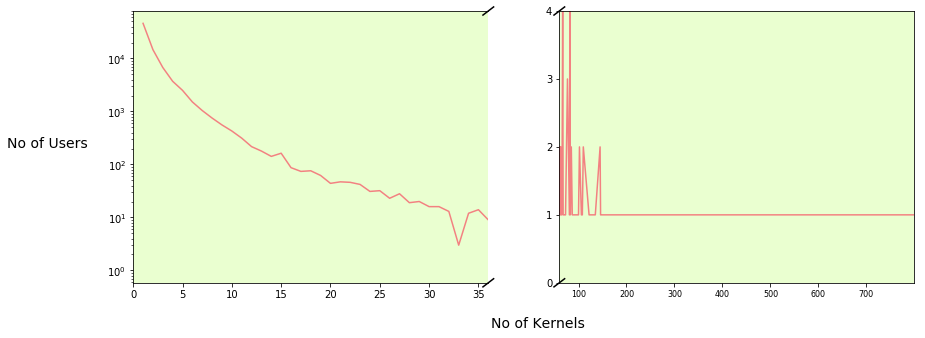

In [10]:
#Graph for Kernel Count per User Count
fig2,(ax,ax2) = plt.subplots(1,2,figsize = (14,5))

ax.plot(temp.NoOfKernels,temp.NoOfUsers)
ax2.plot(temp.NoOfKernels,temp.NoOfUsers)

#Setup break in graph
ax.set_xlim(0,36)
ax2.set_xlim(60,800)
ax2.set_ylim(0,3)
ax.spines['right'].set_visible(False)
ax.set_yscale('log')

#Set ticks
ax.xaxis.set_ticks(np.arange(0, 36, 5))
ax2.xaxis.set_ticks(np.arange(100, 800, 100))
ax2.yaxis.set_ticks(np.arange(0, 5, 1))
ax2.tick_params(axis = 'x', which = 'major', labelsize = 8)


#Set small dash to show break
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)



fig2.text(0.48,0,'No of Kernels',fontsize=14)
fig2.text(0,0.5,'No of Users',fontsize=14)
plt.savefig('../EDA/Figures/fig2.png',bbox_inches='tight')
plt.show()

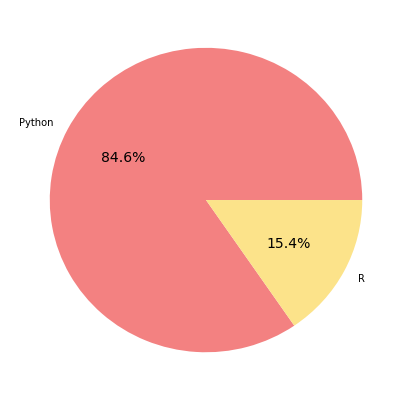

In [11]:
#Number of Kernels per Language
temp = kernels['LanguageName'].value_counts().reset_index()
temp.columns = ['LanguageName','Count']

fig3 = plt.figure(figsize = (7,7))
plt.pie(temp.Count,labels = ['Python','R'],autopct="%1.1f%%", textprops={'fontsize': 14},colors = ['#f38181','#fce38a'])
plt.savefig('../EDA/Figures/fig3.png',bbox_inches='tight')
plt.show()

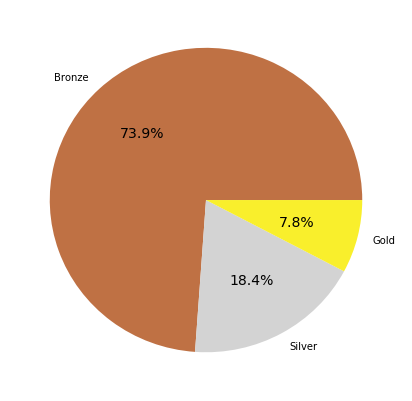

In [12]:
#Medals
medal = kernels[['Id','Medal','LanguageName']].copy()
temp = medal['Medal'].value_counts().reset_index()
temp.columns = ['Medal','Count']

fig4 = plt.figure(figsize = (7,7))
plt.pie(temp['Count'],labels=['Bronze','Silver','Gold'],colors = ['#bf7144','#d3d3d3','#f9ef2c'],autopct="%1.1f%%",textprops={'fontsize': 14})
plt.savefig('../EDA/Figures/fig4.png',bbox_inches='tight')
plt.show()

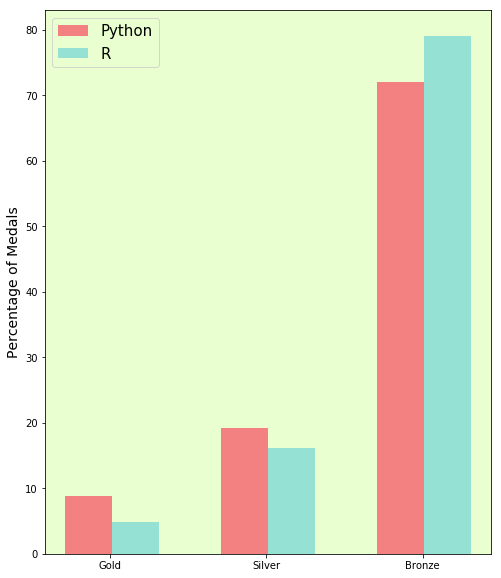

In [13]:
#Language Wise Medal Distribution
temp = medal.loc[medal['LanguageName'] == 'Python']
temp1 = medal.loc[medal['LanguageName'] == 'R']
temp = temp['Medal'].value_counts().reset_index()
temp.columns = ['Medal','Count']
temp['Percent'] = temp['Count']/sum(temp['Count'])*100
temp1 = temp1['Medal'].value_counts().reset_index()
temp1.columns = ['Medal','Count']
temp1['Percent'] = temp1['Count']/sum(temp1['Count'])*100


fig5 = plt.figure(figsize = (8,10))
plt.bar(temp['Medal'],temp['Percent'],tick_label=['Bronze','Silver','Gold'],width = 0.3,align='center')
plt.bar(temp1['Medal']+0.3,temp1['Percent'],tick_label=['Bronze','Silver','Gold'],width = 0.3,align='center')
plt.ylabel('Percentage of Medals',fontsize=14)
plt.xticks([3.14,2.14,1.14]) #slight offset for ticks to center
plt.legend(('Python','R'),prop={'size':15})
plt.savefig('../EDA/Figures/fig5.png',bbox_inches='tight')
plt.show()

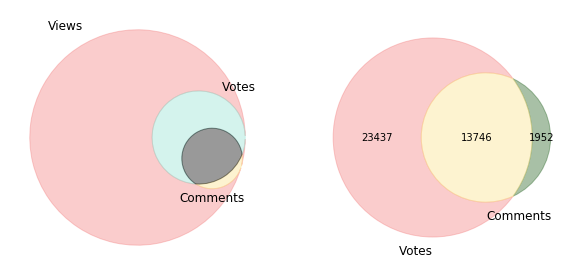

In [14]:
#Relation between comments and votes
temp = kernels[['TotalViews','TotalVotes','TotalComments']].copy()
temp.columns = ['views','votes','comments']
Abc = (temp.loc[(temp.views > 0) & (temp.votes == 0) & (temp.comments == 0)]).count()
aBc = (temp.loc[(temp.views == 0) & (temp.votes > 0) & (temp.comments == 0)]).count()
ABc = (temp.loc[(temp.views > 0) & (temp.votes > 0) & (temp.comments == 0)]).count()
abC = (temp.loc[(temp.views == 0) & (temp.votes == 0) & (temp.comments > 0)]).count()
AbC = (temp.loc[(temp.views > 0) & (temp.votes == 0) & (temp.comments > 0)]).count()
aBC = (temp.loc[(temp.views == 0) & (temp.votes > 0) & (temp.comments > 0)]).count()
ABC = (temp.loc[(temp.views > 0) & (temp.votes > 0) & (temp.comments > 0)]).count()

fig6, axes = plt.subplots(1,2,squeeze = False,figsize = (10,10))
v = venn3(subsets = (Abc[0],aBc[0],ABc[0],abC[0],AbC[0],aBC[0],ABC[0]),set_labels = ('Views', 'Votes', 'Comments'),ax=axes[0][0])
v.get_patch_by_id('100').set_color('#f38181')
v.get_patch_by_id('110').set_color('#95e1d3')
v.get_patch_by_id('101').set_color('#fce38a')
v.get_patch_by_id('111').set_color('black')
#'#f38181','#95e1d3','#fce38a'#EAffd0
for text in v.set_labels:
    text.set_fontsize(12)

#Hide numbers in first diagram
v.get_label_by_id('100').set_alpha(0)
v.get_label_by_id('110').set_alpha(0)
v.get_label_by_id('101').set_alpha(0)
v.get_label_by_id('111').set_alpha(0)

Ab = (temp.loc[(temp.votes > 0) & (temp.comments == 0)]).count()
aB = (temp.loc[(temp.votes == 0) & (temp.comments > 0)]).count()
AB = (temp.loc[(temp.votes > 0) & (temp.comments > 0)]).count()
v1 = venn2(subsets = (Ab[0], aB[0], AB[0]),set_labels = ('Votes', 'Comments'),ax=axes[0][1])
v1.get_patch_by_id('10').set_color('#f38181')
v1.get_patch_by_id('01').set_color('#266322')
v1.get_patch_by_id('11').set_color('#fce38a')

plt.savefig('../EDA/Figures/fig6.png',bbox_inches='tight')
plt.show()

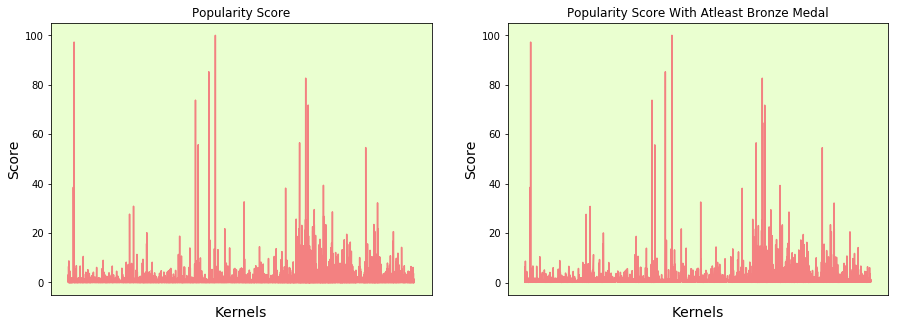

In [15]:
#Popularity Score
temp = kernels[['TotalVotes','TotalComments','Medal']].copy()
temp.columns = ['votes','comments','medal']

temp['score'] = temp.votes*2 + temp.comments #popularity score weightage

temp = temp[temp.score != 0]#Eliminate zero score

#Min max Normalization and scale to 100
temp['score'] = ((temp.score - min(temp.score))/(max(temp.score) - min(temp.score)))*100

fig7,ax = plt.subplots(1,2,figsize = (15,5))

ax[0].plot(temp.score)
ax[0].set_xticklabels([])
ax[0].set_ylabel('Score',fontsize = 14)
ax[0].set_xlabel('Kernels',fontsize = 14)
ax[0].set_title('Popularity Score')
for tic in ax[0].xaxis.get_major_ticks(): #remove x axis tick dashes
    tic.tick1On = tic.tick2On = False

temp1 = temp[~temp.medal.isnull()] #Eliminate zero medal
ax[1].plot(temp1.score)
ax[1].set_xticklabels([])
ax[1].set_ylabel('Score',fontsize = 14)
ax[1].set_xlabel('Kernels',fontsize = 14)
ax[1].set_title('Popularity Score With Atleast Bronze Medal')

for tic in ax[1].xaxis.get_major_ticks(): #remove x axis tick dashes
    tic.tick1On = tic.tick2On = False

plt.savefig('../EDA/Figures/fig7.png',bbox_inches='tight')
plt.show()

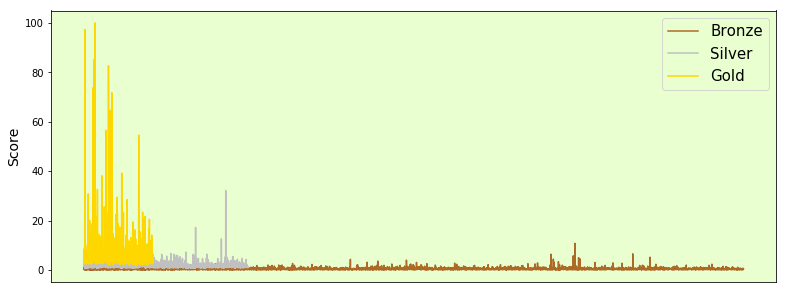

In [16]:
#Popularity Score wrt Medals
temp1 = temp1[['medal','score']]

pbronze = temp1.loc[temp.medal == 3,['medal','score']].reset_index()
psilver = temp1.loc[temp.medal == 2,['medal','score']].reset_index()
pgold = temp1.loc[temp.medal == 1,['medal','score']].reset_index()

fig8 = plt.figure(figsize = (13,5))
plt.plot(pbronze.index,pbronze.score,color = '#ad6a27',label = 'Bronze')
plt.plot(psilver.index,psilver.score,color = 'Silver',label = 'Silver')
plt.plot(pgold.index,pgold.score,color = 'Gold',label = 'Gold')

plt.ylabel('Score',fontsize = 14)
plt.legend(prop={'size':15})
plt.xticks([]) #Remove Xtick Labels

plt.savefig('../EDA/Figures/fig8.png',bbox_inches='tight')
plt.show()

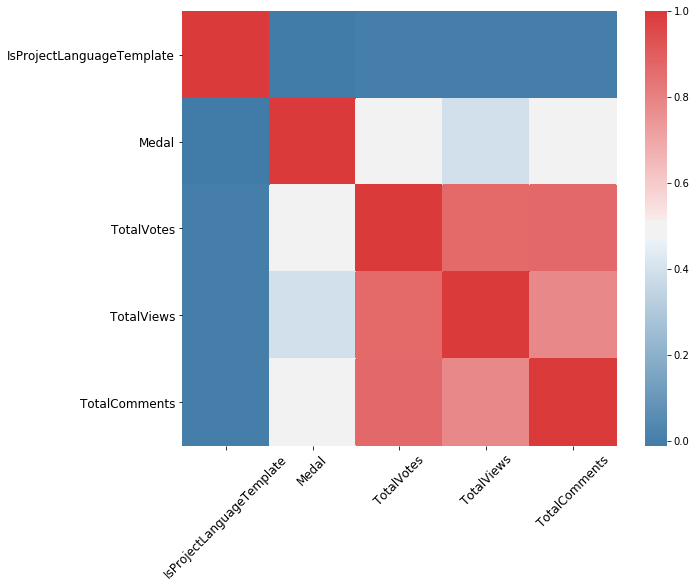

In [17]:
#Correlation Heatmap
temp = kernels[['IsProjectLanguageTemplate','Medal','TotalVotes','TotalViews','TotalComments']].copy()

#Reverse medal values to get accurate correlation
temp.loc[temp.Medal == 1,'Medal'] = 4
temp.loc[temp.Medal == 3,'Medal'] = 1
temp.loc[temp.Medal == 4,'Medal'] = 3

fig8 = plt.figure(figsize = (10,8))

cmap = sns.diverging_palette(240,12,as_cmap = True) #color palette in hsl format

temp1 = temp.corr() #correlation matrix

plt.xticks(rotation = 45,fontsize = 12)
plt.yticks(fontsize = 12)

sns.heatmap(temp1,xticklabels = temp1.columns,yticklabels = temp1.columns,cmap = cmap,square = True)
plt.savefig('../EDA/Figures/fig9.png',bbox_inches='tight')
plt.show()

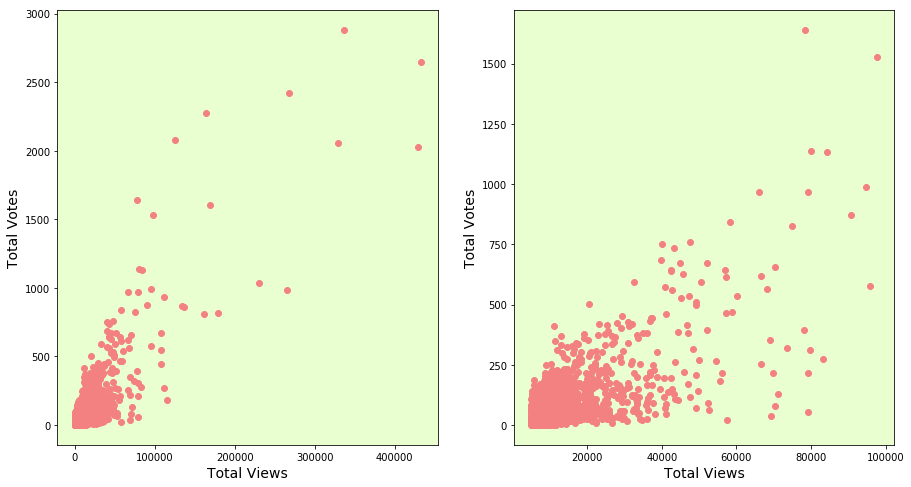

In [18]:
#Views Votes
fig10,ax = plt.subplots(1,2,figsize = (15,8))

for a in ax: 
    a.set_xlabel('Total Views',fontsize = 14)
    a.set_ylabel('Total Votes',fontsize = 14)

temp = kernels.loc[(kernels.TotalViews < 100000) & (kernels.TotalViews > 5000),['TotalViews','TotalVotes']].copy()

ax[0].scatter(kernels.TotalViews, kernels.TotalVotes)
ax[1].scatter(temp.TotalViews, temp.TotalVotes)

plt.savefig('../EDA/Figures/fig10.png',bbox_inches='tight')
plt.show()

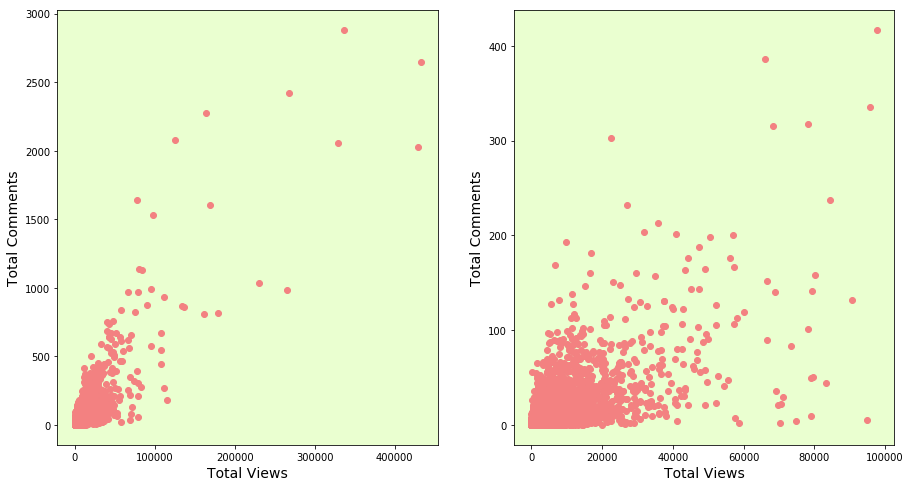

In [19]:
#Views Comments
fig11,ax = plt.subplots(1,2,figsize = (15,8))

for a in ax:
    a.set_xlabel('Total Views',fontsize = 14)
    a.set_ylabel('Total Comments',fontsize = 14)

temp = kernels.loc[(kernels.TotalViews < 100000),['TotalViews','TotalComments']].copy()

ax[0].scatter(kernels.TotalViews, kernels.TotalVotes)
ax[1].scatter(temp.TotalViews, temp.TotalComments)

plt.savefig('fig11.png',bbox_inches='tight')
plt.show()

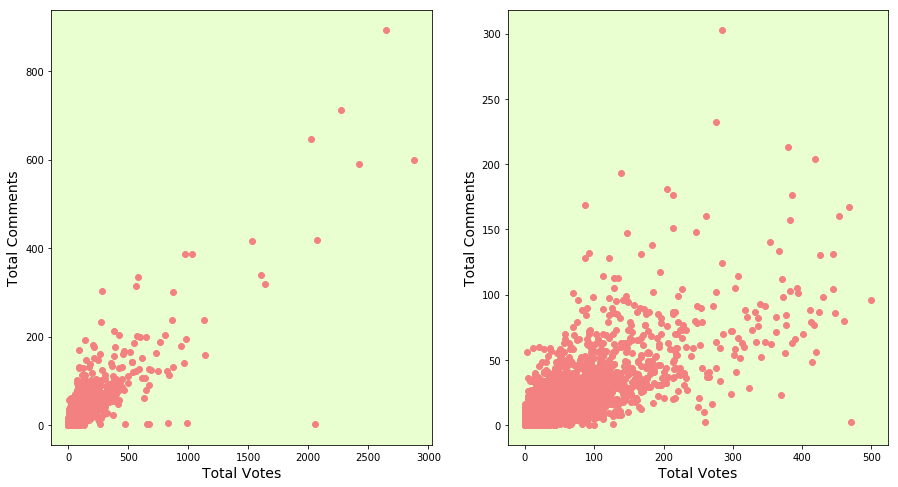

In [20]:
#Votes Comments
fig12,ax = plt.subplots(1,2,figsize = (15,8))

for a in ax:
    a.set_xlabel('Total Votes',fontsize = 14)
    a.set_ylabel('Total Comments',fontsize = 14)

temp = kernels.loc[(kernels.TotalVotes < 500),['TotalVotes','TotalComments']].copy()

ax[0].scatter(kernels.TotalVotes, kernels.TotalComments)
ax[1].scatter(temp.TotalVotes, temp.TotalComments)

plt.savefig('../EDA/Figures/fig12.png',bbox_inches='tight')
plt.show()